In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv'
df = pd.read_csv(url, header=[0], index_col=[0], parse_dates=[0]        )

C:\Users\peter\AppData\Local\Temp\ipykernel_16832\154201598.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(url, header=[0], index_col=[0], parse_dates=[0]        )


In [40]:
df.reset_index(inplace=True)

In [41]:
df['Month'][:12] = df['Month'][:12] + '-2021'
df['Month'][12:24] = df['Month'][12:24] + '-2022'
df['Month'][24:] = df['Month'][24:] + '-2023'

C:\Users\peter\AppData\Local\Temp\ipykernel_16832\2114150781.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Month'][:12] = df['Month'][:12] + '-2021'
C:\Users\peter\AppData\Local\Temp\ipykernel_16832\2114150781.py:1: SettingWithCopy

In [34]:
df['Month'] = pd.to_datetime(df['Month'], format='%d-%m-%Y')

In [42]:
df.to_csv('shampoo_sales.csv')

In [35]:
pdf = df.copy()

In [36]:
df.set_index(df['Month'], inplace=True)

In [37]:
df.drop(columns=['Month'], inplace=True)

C:\Users\peter\AppData\Local\Temp\ipykernel_16832\2498034355.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sum().plot()


<Axes: xlabel='Month'>

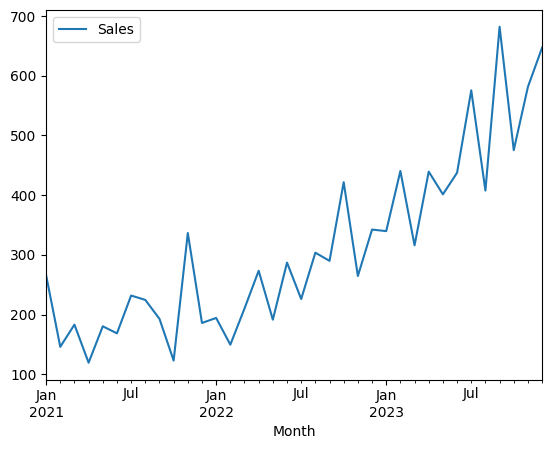

In [9]:
df.resample('M').sum().plot()

In [10]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

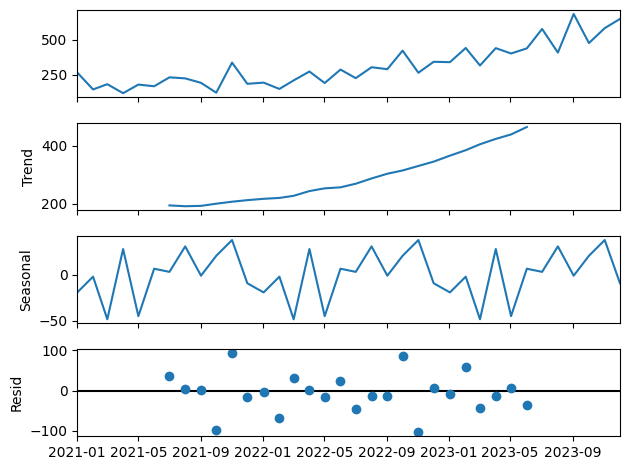

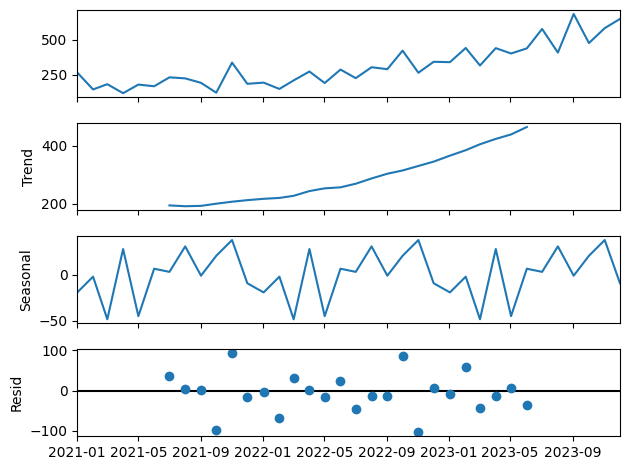

In [11]:
decompostion = seasonal_decompose(df, model='additive', period=12)
decompostion.plot()

In [43]:
stationnary = adfuller(df)
stationnary
#stationnary[0]
#stationnary[1]

(3.0601420836411815,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

In [194]:
df_diff = df.diff().dropna()
df_diff

,Sales
Month,
2021-02-01,-120.1
2021-03-01,37.2
2021-04-01,-63.8
2021-05-01,61.0
2021-06-01,-11.8
2021-07-01,63.3
2021-08-01,-7.3
2021-09-01,-31.7
2021-10-01,-69.9


<Axes: xlabel='Month'>

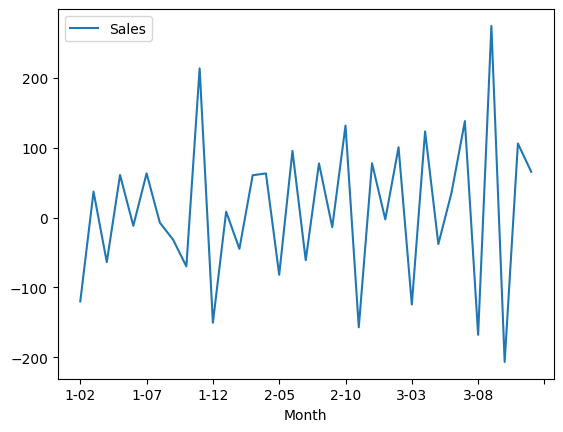

In [10]:
df_diff.plot()

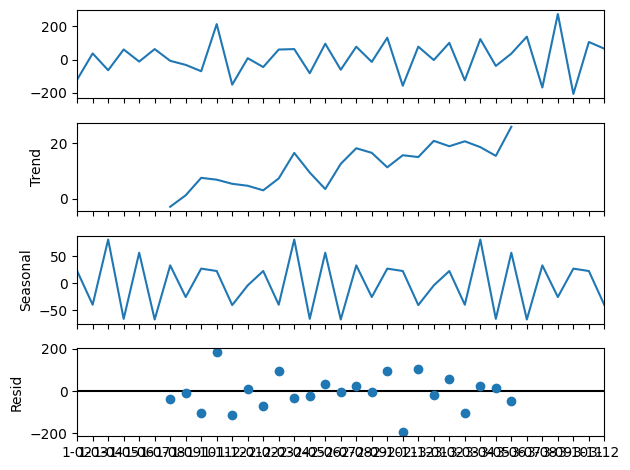

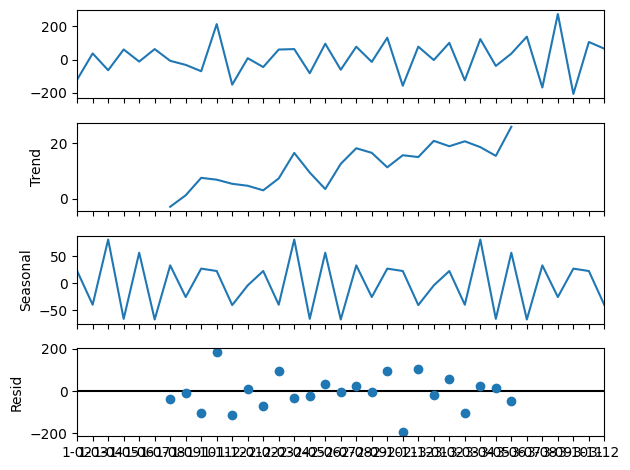

In [11]:
decompostio = seasonal_decompose(df_diff, model='additive', period=12)
decompostio.plot()

In [12]:
stationnary = adfuller(df_diff)
stationnary

(-7.249074055553854,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

<Axes: xlabel='Month'>

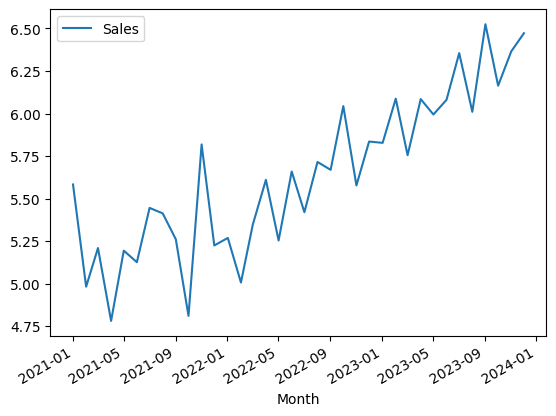

In [ ]:
df_log = np.log(df)
df_log.plot()

In [13]:
df_log

,Sales
Month,
2021-01-01,5.583496
2021-02-01,4.982921
2021-03-01,5.210032
2021-04-01,4.781641
2021-05-01,5.194622
2021-06-01,5.126936
2021-07-01,5.445875
2021-08-01,5.413876
2021-09-01,5.261653


In [14]:
stationnary = adfuller(df_log)
stationnary

(1.798463299383076,
 0.9983459643719065,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 -20.938048906258587)

In [15]:
train, test = df_log[:24], df_log[24:]

In [21]:
test.index

DatetimeIndex(['2023-01-03', '2023-02-03', '2023-03-03', '2023-04-03',
               '2023-05-03', '2023-06-03', '2023-07-03', '2023-08-03',
               '2023-09-03', '2023-10-03', '2023-11-03', '2023-12-03'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [16]:
import pmdarima as pm
model = pm.auto_arima(train, seasonal=True, m=12, start_p=0, start_q=0, max_p=3, max_q=3, start_P=0, start_Q=0, max_P=2, max_Q=2, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=25.443, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=22.221, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=20.221, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=22.221, Time=0.08 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=24.221, Time=0.12 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=21.168, Time=0.04 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=20.323, Time=0.01 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=inf, Time=0.25 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=inf, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 1.057 seconds


In [17]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train, order=(0,1,1), seasonal_order=(0,1,0,12))    
model_fit = model.fit(disp=False)

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [18]:
import joblib 
joblib.dump(model_fit, 'sarima_model.pkl')

['sarima_model.pkl']

In [18]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               Sales   No. Observations:                   25
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                  -8.387
Date:                             Mon, 18 Nov 2024   AIC                             20.774
Time:                                     08:34:22   BIC                             21.744
Sample:                                          0   HQIC                            20.415
                                              - 25                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8604      0.306     -2.810      0.005      -1.461      -0.260
sigma2         0.2121      0.090      2.346      0.019       0.035       0.389
===================================================================================
Ljung-Box (L1) (Q):                   3.65   Jarque-Bera (JB):                 0.00
Prob(Q):                              0.06   Prob(JB):                         1.00
Heteroskedasticity (H):               1.91   Skew:                            -0.03
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
steps = len(test) 
forecast = model_fit.get_forecast(steps=steps) 
predictions = np.exp(forecast.predicted_mean)

c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\peter\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [202]:
confidence_intervals = np.exp(forecast.conf_int()) 
lower_limits = confidence_intervals.iloc[:, 0]
upper_limits = confidence_intervals.iloc[:, 1]

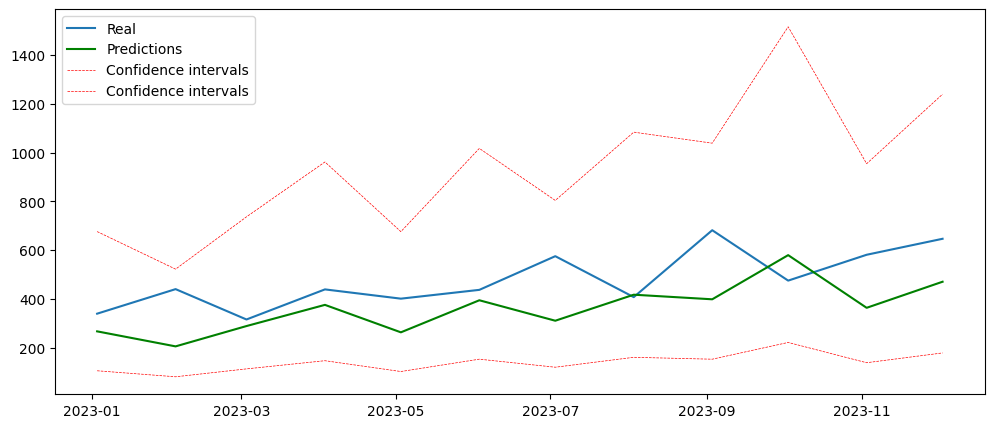

In [203]:
plt.figure(figsize=(12, 5))
plt.plot(test.index, np.exp(test), label='Real')
plt.plot(test.index, predictions, c='green', label='Predictions')
plt.plot(test.index, upper_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
plt.plot(test.index, lower_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
plt.legend()

In [216]:
predictions

24    267.210424
25    205.599374
26    288.939321
27    375.854909
28    263.222209
29    394.695788
30    310.805743
31    417.524883
32    398.684004
33    579.803987
34    363.752739
35    470.746928
Name: predicted_mean, dtype: float64

In [ ]:
#test.index = forecast.predicted_mean.index
forecast.predicted_mean.index = test.index
values = pd.DataFrame({'Actual': np.exp(test['Sales']), 'Predictions': predictions})
values  

,Actual,Predictions
24,339.7,267.210424
25,440.4,205.599374
26,315.9,288.939321
27,439.3,375.854909
28,401.3,263.222209
29,437.4,394.695788
30,575.5,310.805743
31,407.6,417.524883
32,682.0,398.684004
33,475.3,579.803987


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
         
rmse = np.sqrt(mean_squared_error(test, predictions)) 
r_squared = r2_score(test, predictions) 
mae = mean_absolute_error(test, predictions) 
mse = mean_squared_error(test, predictions) 
print(f'RMSE: {rmse}') 
print(f'R²: {r_squared}') 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')
print(f'BIC: {model_fit.bic}')
print(f'AIC: {model_fit.aic}')  

RMSE: 368.6008168572203
R²: -2514248.231339558
MAE: 355.25970301050387
MSE: 135866.56218781008
BIC: 21.016972457507283
AIC: 20.22118191191054


In [147]:
predictions

24    267.210424
25    205.599374
26    288.939321
27    375.854909
28    263.222209
29    394.695788
30    310.805743
31    417.524883
32    398.684004
33    579.803987
34    363.752739
35    470.746928
Name: predicted_mean, dtype: float64

In [150]:
from prophet import Prophet

In [151]:
pdf.columns = ['ds', 'y']

In [152]:
pdf

,ds,y
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3
5,2021-06-01,168.5
6,2021-07-01,231.8
7,2021-08-01,224.5
8,2021-09-01,192.8
9,2021-10-01,122.9


In [153]:
train, test = pdf[:24], pdf[24:]

In [154]:
model = Prophet()
model.fit(train)

11:41:14 - cmdstanpy - INFO - Chain [1] start processing
11:41:20 - cmdstanpy - INFO - Chain [1] done processing


In [171]:
test_dates = test[['ds']]
#future = model.make_future_dataframe(test_dates)
forecast_pr = model.predict(test_dates)

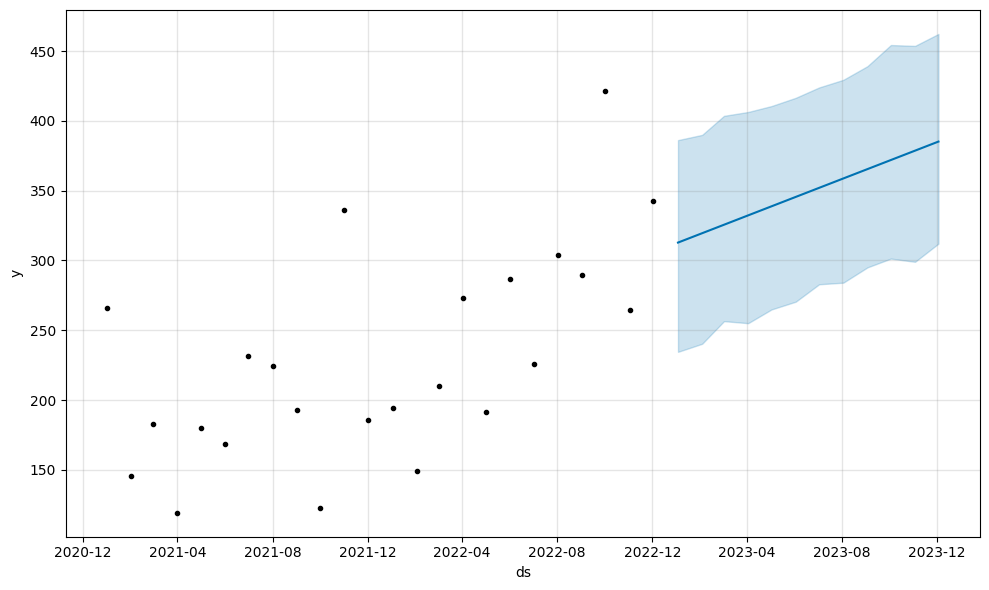

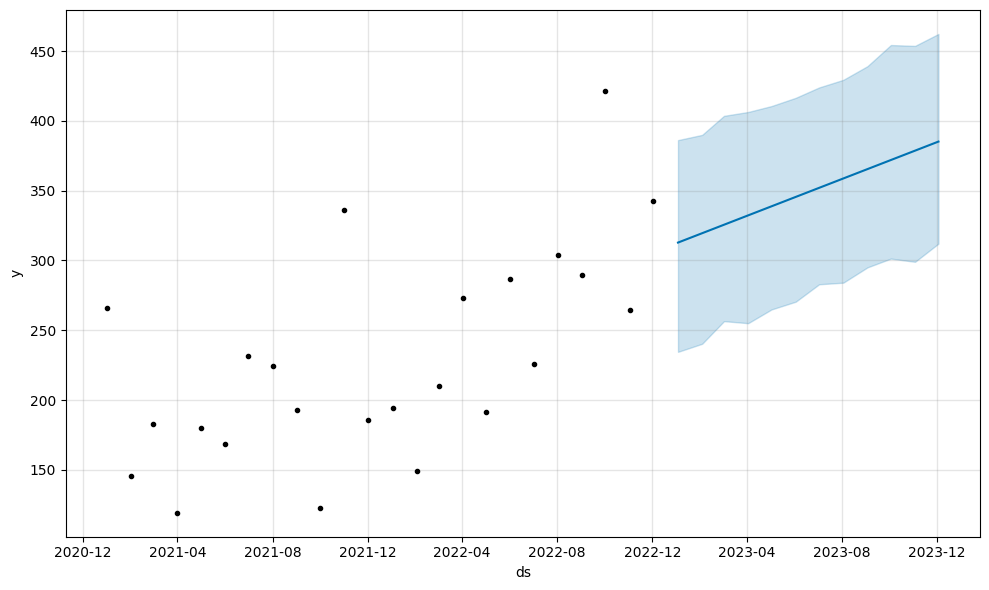

In [172]:
model.plot(forecast_pr)

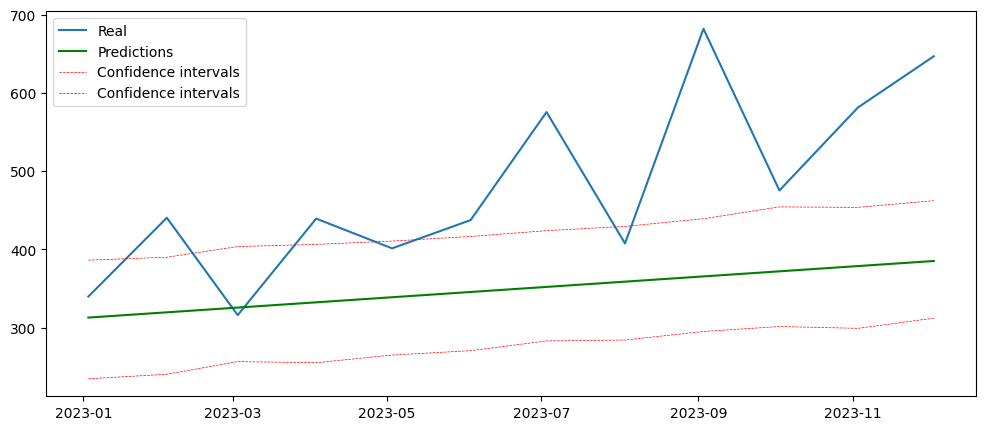

In [180]:
#fig2 = model.plot_components(forecast_pr)
predictions = forecast_pr['yhat']
upper_limits = forecast_pr['yhat_upper']
lower_limits = forecast_pr['yhat_lower']

plt.figure(figsize=(12, 5))
plt.plot(test['ds'], test['y'], label='Real')
plt.plot(test['ds'], predictions, c='green', label='Predictions')
plt.plot(test['ds'], upper_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
plt.plot(test['ds'], lower_limits, c='red', ls='--', lw=0.5, label='Confidence intervals')
plt.legend()

In [174]:
future_predictions = forecast_pr[forecast_pr['ds'] > train['ds'].max()]
future_predictions['yhat']

0     312.810406
1     319.523756
2     325.587426
3     332.300776
4     338.797565
5     345.510915
6     352.007705
7     358.721054
8     365.434403
9     371.931193
10    378.644543
11    385.141332
Name: yhat, dtype: float64

In [182]:
rmse = np.sqrt(mean_squared_error(test['y'], predictions)) 
r_squared = r2_score(test['y'], predictions) 
mae = mean_absolute_error(test['y'], predictions) 
mse = mean_squared_error(test['y'], predictions) 
print(f'RMSE: {rmse}') 
print(f'R²: {r_squared}') 
print(f'MAE: {mae}') 
print(f'MSE: {mse}')

RMSE: 161.25823863390633
R²: -1.064835192526341
MAE: 131.2969815168805
MSE: 26004.219527309877
